## scale_factor = 2
光度计算需要/1000


### 读取光谱拟合结果

In [ ]:
# 读取文件夹
from astropy.io import fits
import numpy as np

# 缩放因子
scale_factor = 2
a = fits.open('mr2251.fits')[1].data.shape[1] // scale_factor
b = fits.open('mr2251.fits')[1].data.shape[2] // scale_factor

folder_names = [
    'reduced2',

    # 'reduced2_i83_93',

    # 'reduced2_i93_83',
  
    # 'reduced2_j90_100',
 
    # 'reduced2_j100_90',
  
    # 'reduced2_i76_66',

    # 'reduced2_i101_111',
   
    # 'reduced2_j81_71',
 
    # 'reduced2_j109_119',


   
    # 'reduced2_median',
    # 'reduced2_flat'

    # 'reduced2_selected'


  
]


# 创建文件夹映射，仅提取 'reduced2' 后面的部分，如果没有则为空字符串
folder_map = {
    folder: f"_{folder[len('reduced2')+1:]}" if folder.startswith('reduced2_') else ''
    for folder in folder_names
}

print(folder_map)

# 初始化存储字典，用来动态存储变量
data_arrays = {}
# 动态生成全局变量
for suffix in folder_map.values():
    globals()[f'ha_flux{suffix}'] = np.full((a, b), np.nan)
    globals()[f'ha_vel{suffix}'] = np.full((a, b), np.nan)
    globals()[f'hb_vel{suffix}'] = np.full((a, b), np.nan)
    globals()[f'ha_sigma{suffix}'] = np.full((a, b), np.nan)
    globals()[f'O3_flux{suffix}'] = np.full((a, b), np.nan)
    globals()[f'O3_vel{suffix}'] = np.full((a, b), np.nan)
    globals()[f'O3_sigma{suffix}'] = np.full((a, b), np.nan)
    globals()[f'chi2{suffix}'] = np.full((a, b), np.nan)
    globals()[f'snr{suffix}'] = np.full((a, b), np.nan)
    globals()[f'habr1_flux{suffix}'] = np.full((a, b), np.nan)
    globals()[f'habr1_vel{suffix}'] = np.full((a, b), np.nan)
    globals()[f'habr1_sigma{suffix}'] = np.full((a, b), np.nan)
    globals()[f'habr2_flux{suffix}'] = np.full((a, b), np.nan)
    globals()[f'habr2_vel{suffix}'] = np.full((a, b), np.nan)
    globals()[f'habr2_sigma{suffix}'] = np.full((a, b), np.nan)

    globals()[f'ha_brflux{suffix}'] = np.full((a, b), np.nan)

# 遍历每个点，并根据文件夹读取数据
for folder, suffix in folder_map.items():
    for i in range(a):
        for j in range(b):
            try:
                # 打开对应文件夹的 FITS 文件
                spec = fits.open(f'./{folder}/{i}_{j}.fits')[1].data

                # 动态填充不同区域的数据到相应的全局变量
                globals()[f'ha_flux{suffix}'][i, j] = spec['Ha_na_1_scale'][0]
                globals()[f'ha_vel{suffix}'][i, j] = spec['Ha_na_1_centerwave'][0]
                globals()[f'hb_vel{suffix}'][i, j] = spec['Hb_na_1_centerwave'][0]   
                globals()[f'ha_sigma{suffix}'][i, j] = spec['Ha_na_1_sigma'][0]
                # globals()[f'O3_flux{suffix}'][i, j] = spec['OIII4959c_1_scale'][0]
                # globals()[f'O3_vel{suffix}'][i, j] = spec['OIII4959c_1_centerwave'][0]
                # globals()[f'O3_sigma{suffix}'][i, j] = spec['OIII4959c_1_sigma'][0]
                globals()[f'chi2{suffix}'][i, j] = spec['2_line_red_chi2'][0]
                globals()[f'snr{suffix}'][i, j] = spec['Ha_whole_br_snr'][0]
                # globals()[f'habr1_flux{suffix}'][i, j] = spec['Ha_br1_1_scale'][0]
                # globals()[f'habr1_vel{suffix}'][i, j] = spec['Ha_br1_1_centerwave'][0]
                # globals()[f'habr1_sigma{suffix}'][i, j] = spec['Ha_br1_1_sigma'][0]
                # globals()[f'habr2_flux{suffix}'][i, j] = spec['Ha_br2_1_scale'][0]
                # globals()[f'habr2_vel{suffix}'][i, j] = spec['Ha_br2_1_centerwave'][0]
                # globals()[f'habr2_sigma{suffix}'][i, j] = spec['Ha_br2_1_sigma'][0]
                





                globals()[f'ha_brflux{suffix}'][i, j] = spec['Ha_whole_br_area'][0]

                print(f"当前循环进度：folder = {folder}, i = {i}, j = {j}", end='\r')

            except:
                continue

In [ ]:
%whos

### 对结果进行选择

过滤后的 vel 数组：


Text(0.5, 0, 'km s$^{-1}$')

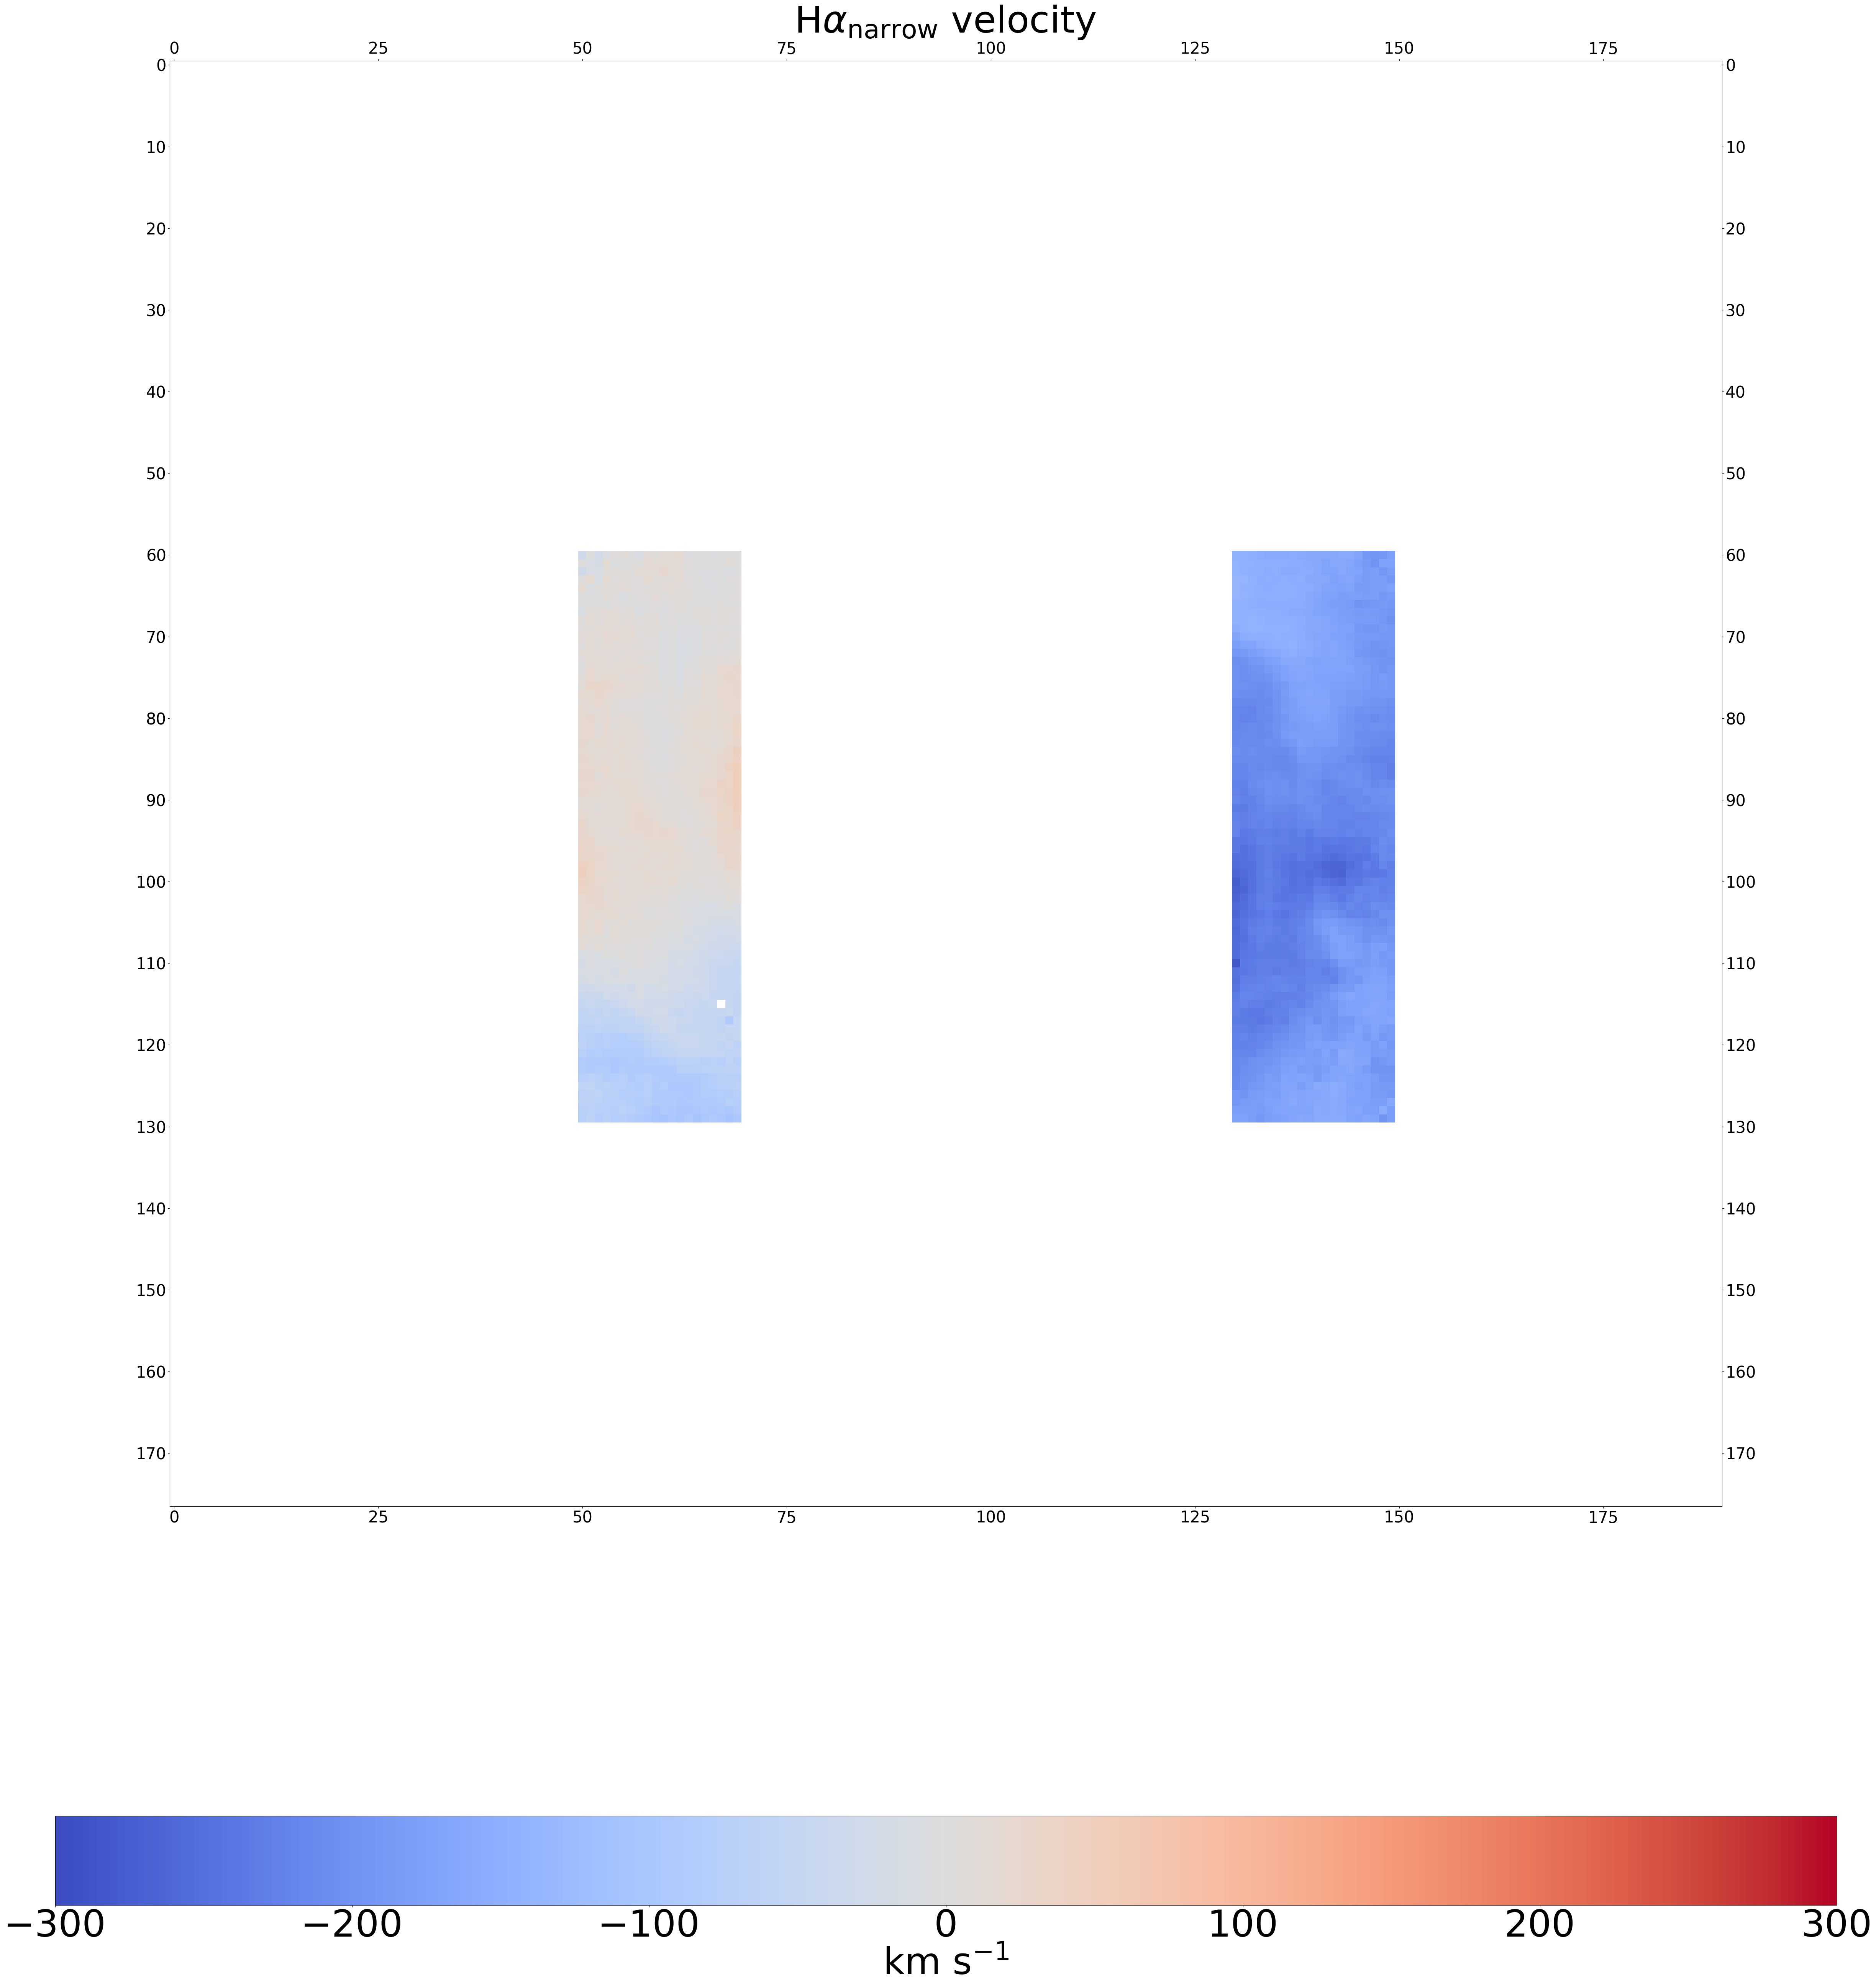

In [2]:
# 这段代码用于生成一个用来表征异常值的模版
# 主要功能：
# 1. 检测和过滤异常值：通过比较每个点与其邻近点的差异
# 2. 将异常值标记为 NaN
# 3. 可视化处理后的速度场
import matplotlib.pyplot as plt
imin = 0
imax = a
jmin = 0
jmax = b
import numpy as np




# 创建一个复制的数组用于保存结果
vel_filtered = ha_vel.copy()
sigma_filtered = ha_sigma.copy()
vel_filtered[0:,0:] = np.nan
sigma_filtered[0:,0:] = np.nan


vel_filtered[60:130,50:70] = ha_vel.copy()[60:130,50:70]
sigma_filtered[60:130,50:70] = ha_sigma.copy()[60:130,50:70]
vel_filtered[60:130,130:150] = ha_vel.copy()[60:130,130:150] 
sigma_filtered[60:130,130:150] = ha_sigma.copy()[60:130,130:150] 
sigma =   np.nanmean(sigma_filtered[imin:imax,jmin:jmax])
# 遍历数组中的每个点（不包括边界点）
for _ in range(2):
    for i in range(vel_filtered.shape[0]):
        for j in range(vel_filtered.shape[1]):
            if np.isnan(vel_filtered[i, j]):
                continue  # 跳过 NaN 的点

            # 动态确定当前点的邻居范围，防止越界
            i_min = max(0, i - 1)  # 行的最小索引
            i_max = min(vel_filtered.shape[0], i + 2)  # 行的最大索引
            j_min = max(0, j - 1)  # 列的最小索引
            j_max = min(vel_filtered.shape[1], j + 2)  # 列的最大索引

            # 提取邻居矩阵，排除当前点本身
            neighbors = vel_filtered[i_min:i_max, j_min:j_max].flatten()  # 获取周围一圈的邻居
            neighbors_sigma = sigma_filtered[i_min:i_max, j_min:j_max].flatten()  # 获取周围一圈的邻居
            
            neighbors = neighbors[neighbors != vel_filtered[i, j]]  # 排除自身点
            neighbors_sigma = neighbors_sigma[neighbors_sigma != sigma_filtered[i, j]]  # 排除自身点
            valid_neighbors = neighbors[~np.isnan(neighbors)]  # 去除 NaN 值的邻居
            valid_neighbors_sigma = neighbors_sigma[~np.isnan(neighbors_sigma)]  # 去除 NaN 值的邻居
  
            if len(valid_neighbors) > 2:
                # 当前点与邻居点的差值
                diffs = np.abs(vel_filtered[i, j] - np.array(valid_neighbors))
                avg_diff = np.mean(diffs)
                
                # 如果当前点比所有邻居都高或都低，并且差值都大于 sigma
                if (vel_filtered[i, j] > max(valid_neighbors) or vel_filtered[i, j] < min(valid_neighbors)) and avg_diff > sigma:
                    sigma_filtered[i, j] = np.median(valid_neighbors_sigma)
                    vel_filtered[i, j] = np.nan




print("过滤后的 vel 数组：")




imin , imax, jmin, jmax = 0, a, 0, b
plt.figure(figsize=(60,70),dpi=100)
plt.imshow((np.e**(vel_filtered[imin:imax, jmin:jmax]) - 6564.4) / 6564.4 * 3e5 ,vmin = -300, vmax= 300, cmap='coolwarm'  )
y_ticks = np.arange(0, (imax - imin) + 1, 10)
plt.yticks(y_ticks)

plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labeltop=True, labelleft=True, labelright=True)




plt.title(r'H$\alpha_{\rm narrow}$ velocity ',fontsize=70)
clb=plt.colorbar(orientation='horizontal')
clb.ax.tick_params(labelsize=70) 
clb.ax.set_xlabel(r'km s$^{-1}$',fontsize=70)

sigma: 65.29440688552252


Processing: 100%|██████████| 500/500 [27:40<00:00,  3.32s/it]


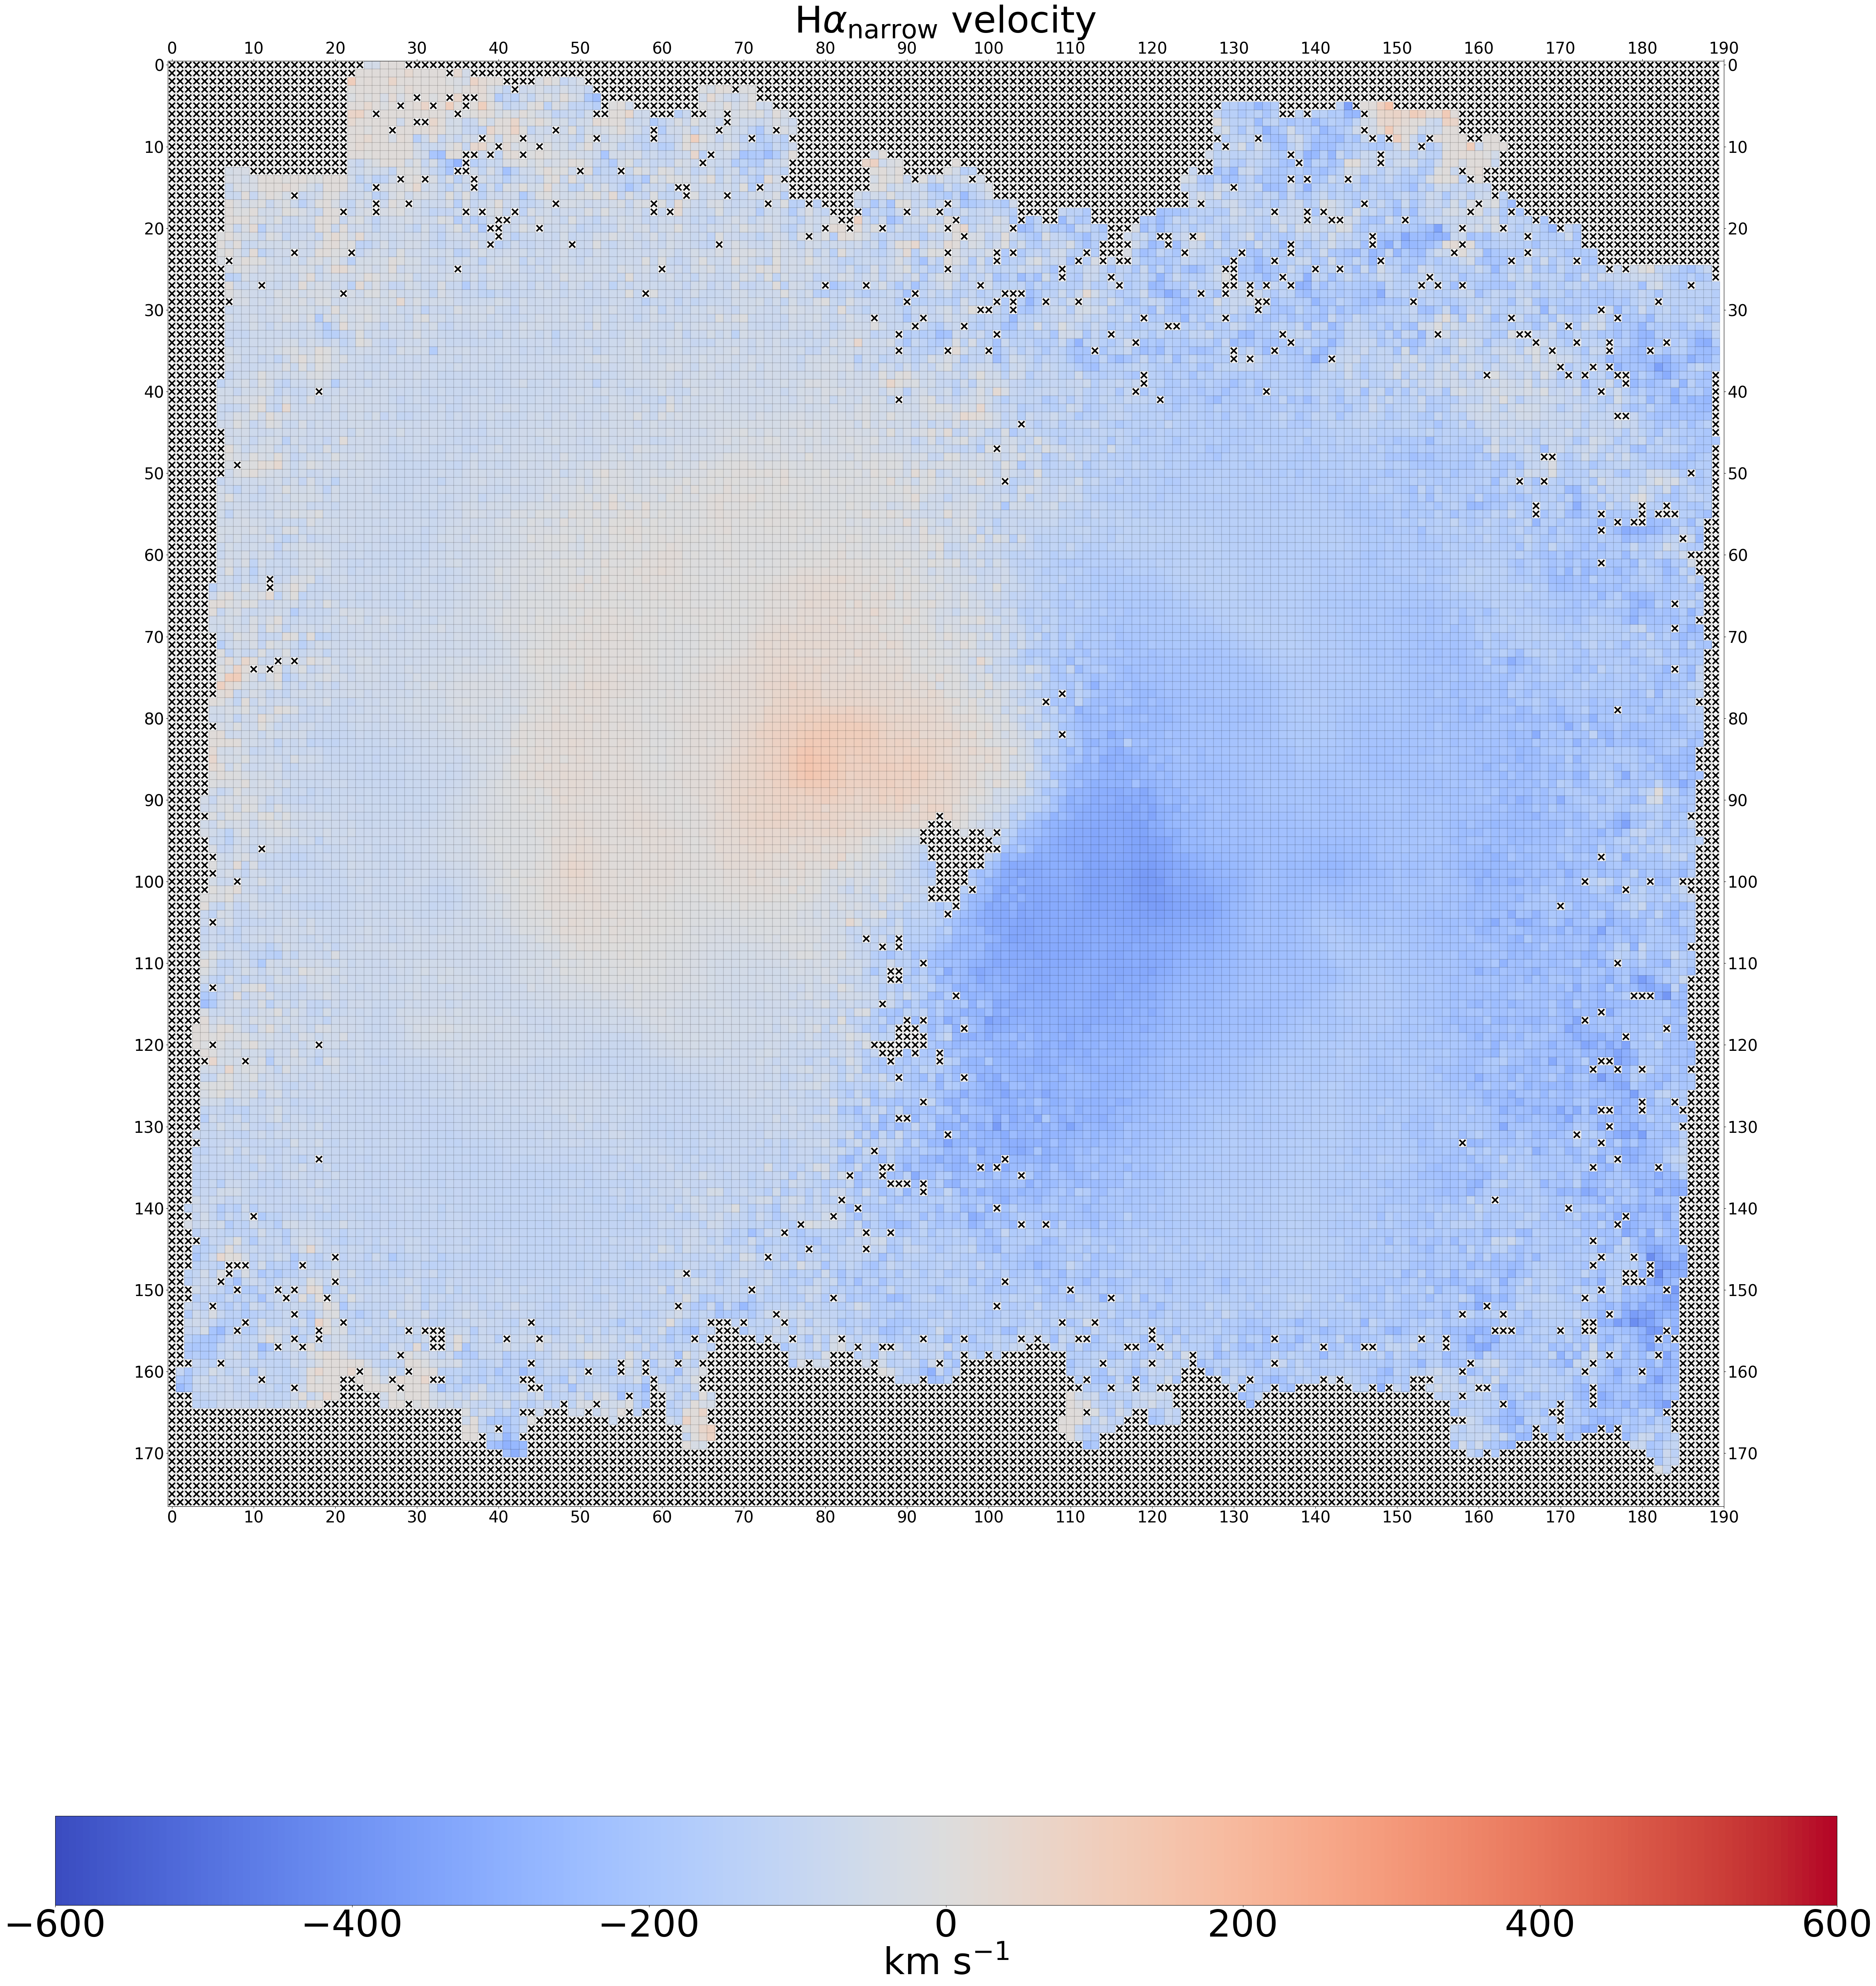

In [5]:
# 根据过滤后的 O3_vel_filtered 来选择拟合的数据
from tqdm import tqdm  # 确保你已经安装了 tqdm 库
f1 = 1.5
f2 = 5
imin , imax, jmin, jmax = 0, a, 0, b 
sigma0 =   np.nanmean(sigma_filtered[imin:imax,jmin:jmax])
# 直接计算上下限，不需要列表
lower_bound = (np.e**(vel_filtered[imin:imax, jmin:jmax] - 1 * sigma0) - 6564.4) / 6564.4 * 3e5
upper_bound = (np.e**(vel_filtered[imin:imax, jmin:jmax] + 1 * sigma0) - 6564.4) / 6564.4 * 3e5


sigma = np.median((upper_bound - lower_bound)[~np.isnan(upper_bound - lower_bound)]) / 2
print('sigma:',sigma)


image_data_sources = [ha_vel, ha_vel_i83_93, ha_vel_i93_83, ha_vel_j90_100,
                      ha_vel_j100_90, ha_vel_i76_66, ha_vel_i101_111, ha_vel_j81_71, ha_vel_j109_119]
sigma_data_sources = [ha_sigma, ha_sigma_i83_93, ha_sigma_i93_83, ha_sigma_j90_100,
                      ha_sigma_j100_90, ha_sigma_i76_66, ha_sigma_i101_111, ha_sigma_j81_71, ha_sigma_j109_119]
chi2_data_sources = [chi2, chi2_i83_93, chi2_i93_83, chi2_j90_100,
                     chi2_j100_90, chi2_i76_66, chi2_i101_111, chi2_j81_71, chi2_j109_119]
# 预先计算所有图像的速度值
image_velocity_list = [(np.e**data[imin:imax, jmin:jmax] - 6564.4) / 6564.4 * 3e5 for data in image_data_sources]
sigma_list = [data[imin:imax, jmin:jmax] for data in sigma_data_sources]
chi2_list = [data[imin:imax, jmin:jmax] for data in chi2_data_sources]
# 计算第一个图像的速度值
image_selected = image_velocity_list[0].copy()
sigma_selected = sigma_list[0].copy()
chi2_selected = chi2_list[0].copy()
# 找出第一个图像中的异常值

normal_mask = (image_selected > lower_bound) & (image_selected < upper_bound) & (sigma_selected <= f2 * sigma0)&(chi2_selected<1000)

# 取反，找到异常值的坐标
outliers_mask = ~normal_mask

# 将异常值标记为 NaN
image_selected[outliers_mask] = np.nan

# 定义计算梯度函数
def gradient_sum(image, i, j):
    """
    计算 (i, j) 周围 8 邻域的梯度绝对值之和
    """
    grad_sum = 0
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    for di, dj in directions:
        ni, nj = i + di, j + dj
        if 0 <= ni < image.shape[0] and 0 <= nj < image.shape[1] and not np.isnan(image[ni, nj]):
            grad_sum += abs(image[ni, nj] - image[i, j])
    return grad_sum

for idx, image in enumerate(image_velocity_list[1:], 1):
 
    for i in range(image_selected.shape[0]):
        for j in range(image_selected.shape[1]):
            conditions_met = (
                lower_bound[i, j] <= image[i, j] <= upper_bound[i, j] and 
                sigma_list[idx][i, j] <= f2 * sigma0 and 
                chi2_list[idx][i, j] < 1000
            )

            # 如果第一个图像该点是 NaN，尝试从其他图像中找到非异常值
            if np.isnan(image_selected[i, j]):
                if conditions_met:  # 找到非异常值
                    image_selected[i, j] = image[i, j]  # 赋值并停止查找
               
            # 如果第一个图像该点不是 NaN，检查后续图像
            else:
  
                if conditions_met:  
                # 如果下一个不是异常值，计算梯度平滑度
                    current_grad = gradient_sum(image_selected, i, j)
                    temp_image = image_selected.copy()
                    temp_image[i, j] = image[i, j]
                    new_grad = gradient_sum(temp_image, i, j)
                
                    if new_grad < current_grad:
                        # 用梯度更小的值替换
                        image_selected[i, j] = image[i, j]
                      
def fill_nan_with_median(image):
    """
    用周围非 NaN 邻域的中位数填充图像中为 NaN 的点
    """
    filled_image = np.copy(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if np.isnan(image[i, j]):
         
                    
                # 获取周围 8 邻域的像素
                neighbors = []
                directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
                for di, dj in directions:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < image.shape[0] and 0 <= nj < image.shape[1] and not np.isnan(image[ni, nj]):
                        neighbors.append(image[ni, nj])
                
                # 计算邻居的中位数并填充 NaN
                if len(neighbors) > 2:
                    filled_image[i, j] = np.median(neighbors)
    
    return filled_image


for _ in tqdm(range(500), desc="Processing"):

# 调用函数来填充 NaN
    image_selected_fill_nan = fill_nan_with_median(image_selected)
   
    

    upper_bound = image_selected_fill_nan + f1* sigma
    lower_bound = image_selected_fill_nan - f1* sigma

    for idx, image in enumerate(image_velocity_list):
                # 遍历所有图像数据源
        for i in range(image_selected.shape[0]):
            for j in range(image_selected.shape[1]):
                conditions_met = (
                    lower_bound[i, j] <= image[i, j] <= upper_bound[i, j] and 
                    sigma_list[idx][i, j] <= f2 * sigma0 and 
                    chi2_list[idx][i, j] < 1000
                )

                # 如果第一个图像该点是 NaN，尝试从其他图像中找到非异常值
                if np.isnan(image_selected[i, j]):
                    if conditions_met:  # 找到非异常值
                        image_selected[i, j] = image[i, j]  # 赋值并停止查找
                
                # 如果第一个图像该点不是 NaN，检查后续图像
                else:
                
                    
                    if conditions_met:  
                    # 如果下一个不是异常值，计算梯度平滑度
                        current_grad = gradient_sum(image_selected, i, j)
                        temp_image = image_selected.copy()
                        temp_image[i, j] = image[i, j]
                        new_grad = gradient_sum(temp_image, i, j)
                    
                        if new_grad < current_grad:
                            # 用梯度更小的值替换
                            image_selected[i, j] = image[i, j]



plt.figure(figsize=(60,70),dpi=100)
plt.imshow( image_selected,vmin = -600, vmax= 600, cmap='coolwarm'  )

for i in range(image_selected.shape[0]):
    for j in range(image_selected.shape[1]):
        if np.isnan(image_selected[i, j]):
            
            plt.plot([j-0.3, j+0.3], [i-0.3, i+0.3], 'k-', linewidth=3)
            plt.plot([j+0.3, j-0.3], [i-0.3, i+0.3], 'k-', linewidth=3)  # 绘制两个交叉的线段

        rect = plt.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=0.1, edgecolor='black', facecolor='none')
        plt.gca().add_patch(rect)



# for i in range(100,105):
#     for j in range(90,95):
        
            
#             plt.plot([j-0.3, j+0.3], [i-0.3, i+0.3], 'k-', linewidth=5,zorder = 10)
#             # plt.plot([j+0.3, j-0.3], [i-0.3, i+0.3], 'k-', linewidth=5,zorder = 10)  # 绘制两个交叉的线段
y_ticks = np.arange(0, (imax - imin) + 1, 10)
plt.yticks(y_ticks)
x_ticks = np.arange(0, (jmax - jmin) + 1, 10)
plt.xticks(x_ticks)

plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labeltop=True, labelleft=True, labelright=True)




plt.title(r'H$\alpha_{\rm narrow}$ velocity ',fontsize=70)
clb=plt.colorbar(orientation='horizontal')
clb.ax.tick_params(labelsize=70) 
clb.ax.set_xlabel(r'km s$^{-1}$',fontsize=70)

plt.show()



In [ ]:
# 获取数据文件夹
folder_names = []
for source in image_data_sources:
    # 获取变量名，优先选择ha_vel开头的
    matching_names = [name for name, value in globals().items() if value is source]
    var_name = next(name for name in matching_names if name.startswith('ha_vel'))
    
    # 从变量名生成文件夹名
    if var_name == 'ha_vel':
        folder_name = 'reduced2'
    else:
        print(var_name)
        # 从 ha_vel_i83_93 这样的格式提取后缀
        suffix = var_name[len('ha_vel_'):]
        folder_name = f'reduced2_{suffix}'
    
    folder_names.append(folder_name)

# 生成 folders 字典
folders = {
    folder: f"ha_vel_{folder[len('reduced2')+1:]}" if folder.startswith('reduced2_') else 'ha_vel'
    for folder in folder_names
}
folders

In [ ]:
# 复制文件到目标文件夹

import os
import shutil

# 将最终选择的拟合结果保存到destination_folder中


# 定义目标文件夹路径
destination_folder = './reduced2_selected/'

# 如果目标文件夹存在，先删除它及其内容
if os.path.exists(destination_folder):
    shutil.rmtree(destination_folder)

# 重新创建一个空的目标文件夹
os.makedirs(destination_folder)
# 遍历 image_selected，找到非 NaN 的点，并将对应的文件从最后选择的文件夹复制到新的文件夹
for i in range(image_selected.shape[0]):
    for j in range(image_selected.shape[1]):
        if not np.isnan(image_selected[i, j]):  # 如果该点不是 NaN，表示选中了该数据点
            
            # 遍历每个图像数据源，查找最终被选入 image_selected 的数据来源
            for idx, (source_folder, vel_name) in enumerate(folders.items()):
                if np.isclose(image_selected[i, j], image_velocity_list[idx][i, j]):

                    file_name_fits = f'{i}_{j}.fits'
                    file_name_pdf = f'{i}_{j}.pdf'
                    

                    # 源文件路径
                    source_path_fits = os.path.join(source_folder, file_name_fits)
                    source_path_pdf = os.path.join(source_folder, file_name_pdf)
                    
                    # 目标文件路径
                    destination_path_fits = os.path.join(destination_folder, file_name_fits)
                    destination_path_pdf = os.path.join(destination_folder, file_name_pdf)

                    # 尝试复制 .fits 文件
                    try:
                        shutil.copy(source_path_fits, destination_path_fits)
                        
                        # print(f"复制文件 {file_name_fits} 从 {vel_name} 成功！")
                    except FileNotFoundError:
                        print(f"文件 {file_name_fits} 在 {vel_name} 中未找到，跳过该文件。")
                    
                    # 尝试复制 .pdf 文件
                    try:
                        shutil.copy(source_path_pdf, destination_path_pdf)
                        # print(f"复制文件 {file_name_pdf} 从 {vel_name} 成功！")
                    except FileNotFoundError:
                        print(f"文件 {file_name_pdf} 在 {vel_name} 中未找到，跳过该文件。")

                    # 一旦找到并复制了对应文件，停止继续查找
                    break

### 画图

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
hasnr = np.load('./hasnr_selected.npy')
def plot_velocity_map(data, title=r'H$\alpha_{\rm na}$ velocity', 
                     imin=0, imax=a, jmin=0, jmax=b,
                     vmin=-600, vmax=600):
    """
    绘制速度图
    
    Parameters:
    -----------
    data : array-like
        要绘制的数据
    title : str, optional
        图表标题
    imin, imax : int, optional
        行索引范围
    jmin, jmax : int, optional
        列索引范围
    vmin, vmax : float, optional
        颜色映射的最小值和最大值
    """

    data[hasnr < 5] = np.nan






    plt.figure(figsize=(60,70), dpi=100)
    plt.imshow(data[imin:imax, jmin:jmax], vmin=vmin, vmax=vmax, cmap='coolwarm',aspect='equal',origin='lower' )

    # # 绘制网格和标记NaN值
    # for i in range(imax-imin):
    #     for j in range(jmax-jmin):
    #         if np.isnan(data[i+imin, j+jmin]):
    #             plt.plot([j-0.3, j+0.3], [i-0.3, i+0.3], 'k-', linewidth=3)
    #             plt.plot([j+0.3, j-0.3], [i-0.3, i+0.3], 'k-', linewidth=3)

    #         rect = plt.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=0.1, edgecolor='black', facecolor='none')
    #         plt.gca().add_patch(rect)



    # 计算对应的标签值
    # tick_labels = ((x_ticks + jmin)-179.206583740468)*( 7.03888888888889E-06*3600)
    tick_labels = np.array([-4, -2, 0, 2, 4])

    # 计算对应的 x_ticks
    x_ticks = (tick_labels / (- 7.03888888888889E-06*3600*2)) +190/2 - jmin

    # 绘制数据

    # 设置 x 轴刻度
    plt.xticks(x_ticks, tick_labels)

    y_ticks = (tick_labels / (7.03888888888889E-06*3600*2)) +177/2 - imin
    plt.yticks(y_ticks, tick_labels)
    plt.tick_params(
        axis='both',
        which='both',
        labelsize=120,
        bottom=True,
        top=True,
        left=True,
        right=True,
        labelbottom=True,
        labeltop=False,
        labelleft=True,
        labelright=False,
         direction='in', length=40, width=10,pad=30
    )
    plt.xlabel(r"$\Delta  $RA[arcsec]", fontsize=120, labelpad=20)
    plt.ylabel(r"$\Delta $DEC[arcsec]", fontsize=120, labelpad=20)
    # 加粗边框
    ax = plt.gca()  # 获取当前的轴
    for spine in ax.spines.values():
        spine.set_linewidth(10)  # 设置边框宽度为3（可以根据需要调整）


    plt.title(title, fontsize=150,pad = 100)
    # clb = plt.colorbar(orientation='horizontal')


    # 添加 colorbar
    clb = plt.colorbar(fraction=0.04, pad=0.04)  # fraction 控制颜色条的宽度，pad 控制颜色条与图像之间的间距

    # 调整 colorbar 的刻度字体大小
    clb.ax.tick_params(labelsize=100)

    # 设置 colorbar 标题在右侧
    clb.ax.yaxis.set_label_position('right')  # 将标题移到右侧
    clb.ax.set_ylabel(r'km s$^{-1}$', fontsize=140, labelpad=20)  # 设置标题和右边的距离

    # 设置 colorbar 的高度和图像一致
    # 调整 fraction 参数，使得 colorbar 的高度与图像一致
    # plt.savefig("i83_93.png",dpi =100)
    

    plt.show()
def plot_flux_map(data, title=r'H$\alpha_{\rm na}$ flux', 
                  imin=0, imax=a, jmin=0, jmax=b,
                  vmin=1, vmax=100000):
    """
    绘制通量图
    
    Parameters:
    -----------
    data : array-like
        要绘制的通量数据
    title : str, optional
        图表标题
    imin, imax : int, optional
        行索引范围
    jmin, jmax : int, optional
        列索引范围
    vmin, vmax : float, optional
        颜色映射的最小值和最大值
    """
    data[hasnr < 5] = np.nan

    plt.imshow(data[imin:imax, jmin:jmax], norm=LogNorm(vmin=vmin, vmax=vmax), cmap='inferno' ,aspect='equal',origin='lower' )

    # 绘制网格和标记NaN值
    # for i in range(imax-imin):
    #     for j in range(jmax-jmin):
    #         if np.isnan(data[i+imin, j+jmin]):
    #             plt.plot([j-0.3, j+0.3], [i-0.3, i+0.3], 'k-', linewidth=3)
    #             plt.plot([j+0.3, j-0.3], [i-0.3, i+0.3], 'k-', linewidth=3)

    #         rect = plt.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=0.1, edgecolor='black', facecolor='none')
    #         plt.gca().add_patch(rect)

    tick_labels = np.array([-4, -2, 0, 2, 4])

    # 计算对应的 x_ticks
    x_ticks = (tick_labels / (- 7.03888888888889E-06*3600*2)) +190/2 - jmin

    # 绘制数据

    # 设置 x 轴刻度
    plt.xticks(x_ticks, tick_labels)

    y_ticks = (tick_labels / (7.03888888888889E-06*3600*2)) +177/2 - imin
    plt.yticks(y_ticks, tick_labels)
    plt.tick_params(
        axis='both',
        which='both',
        labelsize=120,
        bottom=True,
        top=True,
        left=True,
        right=True,
        labelbottom=True,
        labeltop=False,
        labelleft=True,
        labelright=False,
         direction='in', length=40, width=10,pad=30
    )
    plt.xlabel(r"$\Delta  $RA[arcsec]", fontsize=120, labelpad=20)
    plt.ylabel(r"$\Delta $DEC[arcsec]", fontsize=120, labelpad=20)
    # 加粗边框
    ax = plt.gca()  # 获取当前的轴
    for spine in ax.spines.values():
        spine.set_linewidth(10)  # 设置边框宽度为3（可以根据需要调整）


    plt.title(title, fontsize=150,pad = 100)
    # clb = plt.colorbar(orientation='horizontal')


    # 添加 colorbar
    clb = plt.colorbar(fraction=0.04, pad=0.04)  # fraction 控制颜色条的宽度，pad 控制颜色条与图像之间的间距

    # 调整 colorbar 的刻度字体大小
    clb.ax.tick_params(labelsize=100)

    # 设置 colorbar 标题在右侧
    clb.ax.yaxis.set_label_position('right')  # 将标题移到右侧
    clb.ax.set_ylabel(r'$\rm 10^{-20}\ erg\ s^{-1}\ cm^{-2}$', fontsize=140, labelpad=20)  # 设置标题和右边的距离

    # 设置 colorbar 的高度和图像一致
    # 调整 fraction 参数，使得 colorbar 的高度与图像一致
    # plt.savefig("16.png",dpi =100)
    

    plt.show()


# 绘制 ha_vel_selected_filled
# plot_velocity_map((np.e**ha_vel_i83_93-6564.4)/6564.4*3e5,vmin=-350,vmax=350, title=r'H$\alpha_{\rm na}$ velocity')

# plot_velocity_map((np.e**ha_vel_median-6564.4)/6564.4*3e5,vmin=-300,vmax=300, title=r'H$\alpha_{\rm narrow}$ velocity(median refitted)')


# plot_velocity_map((np.e**ha_vel_i83_93-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (i83_93)')
# plot_velocity_map((np.e**ha_vel_i93_83-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (i93_83)')
# plot_velocity_map((np.e**O3_vel_i83_93-4960.30)/4960.30*3e5, title=r'OIII velocity')

# plot_velocity_map((np.e**ha_vel_i76_66-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (i76_66)')
# plot_velocity_map((np.e**ha_vel_i101_111-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (i101_111)')
# plot_velocity_map((np.e**ha_vel_i76_66_k1-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (i76_66)')
# plot_velocity_map((np.e**ha_vel_i101_111_k1-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (i101_111)')
# plot_velocity_map((np.e**ha_vel_j90_100-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (j90_100)')
# plot_velocity_map((np.e**ha_vel_j100_90-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (j100_90)')
# plot_velocity_map((np.e**ha_vel_j81_71-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (j81_71)')
# plot_velocity_map((np.e**ha_vel_test-6564.4)/6564.4*3e5, vmin=-350,vmax=350,title=r'H$\alpha_{\rm narrow}$ velocity (test)')

# plot_velocity_map((np.e**ha_vel_j109_119-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (j109_119)')
# plot_velocity_map((np.e**ha_vel_j81_71_k1-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (j81_71)')

# plot_velocity_map((np.e**ha_vel_j109_119_k1-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (j109_119)')
var_name = "ha_vel_selected"

plot_velocity_map((np.e**(globals()[var_name]) - 6564.4) / 6564.4 * 3e5,vmin=-350,vmax=350, title=r'H$\alpha_{\rm narrow}$ velocity (optimized)')
# plot_velocity_map((np.e**ha_vel_flat-6564.4)/6564.4*3e5,vmin=-300,vmax=300, title=r'H$\alpha_{\rm narrow}$ velocity')
# plot_velocity_map((np.e**(globals()[var_name]) - 6564.4) / 6564.4 * 3e5,vmin=-300,vmax=300, title=r'H$\alpha_{\rm narrow}$ velocity (Selected)')
# plot_velocity_map((np.e**ha_vel_best-6564.4)/6564.4*3e5,vmin=-600,vmax=600, title=r'H$\alpha_{\rm narrow}$ velocity (Selected)')
# plot_velocity_map((np.e**ha_vel5-6564.4)/6564.4*3e5,vmin=-600,vmax=600, title=r'H$\alpha_{\rm narrow}$ velocity')
# plot_velocity_map((np.e**ha_vel_median-6564.4)/6564.4*3e5, title=r'H$\alpha_{\rm narrow}$ velocity (median)')
# # 绘制 ha_flux



# A = globals()['ha_flux_flat']
# mu = globals()['ha_vel_flat']
# c = globals()['ha_sigma_flat']
# area = np.sqrt(2 * np.pi)*A * c*np.exp(mu + (c**2) / 2) 
# plot_flux_map(area,title=r'H$\alpha_{\rm na}$ flux')


# A = globals()['ha_flux_selected_k1']
# mu = globals()['ha_vel_selected_k1']
# c = globals()['ha_sigma_selected_k1']
# area = np.sqrt(2 * np.pi)*A * c*np.exp(mu + (c**2) / 2) 
# plot_flux_map(area,title=r'H$\alpha_{\rm na}$ flux(optimized)')


# A = globals()['habr1_flux']
# mu = globals()['habr1_vel']
# c = globals()['habr1_sigma']
# plt.imshow(globals()['habr2_vel'])
# area1 = np.sqrt(2 * np.pi)*A * c*np.exp(mu + (c**2) / 2)
# A = globals()['habr2_flux']
# mu = globals()['habr2_vel']
# c = globals()['habr2_sigma']


# area2 = np.sqrt(2 * np.pi)*A * c*np.exp(mu + (c**2) / 2)
# plot_flux_map(area1+area2,title=r'H$\alpha_{\rm br}$ flux',vmin=1,vmax=1e10)



# A = globals()['ha_flux_i76_66_k1']
# mu = globals()['ha_vel_i76_66_k1']
# c = globals()['ha_sigma_i76_66_k1']
# area = np.sqrt(2 * np.pi)*A * c*np.exp(mu + (c**2) / 2) 
# plot_flux_map(area,title=r'H$\alpha_{\rm na}$ flux')

# A = globals()['ha_flux_i101_111_k1']
# mu = globals()['ha_vel_i101_111_k1']
# c = globals()['ha_sigma_i101_111_k1']
# area = np.sqrt(2 * np.pi)*A * c*np.exp(mu + (c**2) / 2) 
# plot_flux_map(area,title=r'H$\alpha_{\rm na}$ flux')

# A = globals()['ha_flux_j81_71_k1']
# mu = globals()['ha_vel_j81_71_k1']
# c = globals()['ha_sigma_j81_71_k1']
# area = np.sqrt(2 * np.pi)*A * c*np.exp(mu + (c**2) / 2) 
# plot_flux_map(area,title=r'H$\alpha_{\rm na}$ flux')

# A = globals()['ha_flux_j109_119_k1']
# mu = globals()['ha_vel_j109_119_k1']
# c = globals()['ha_sigma_j109_119_k1']
# area = np.sqrt(2 * np.pi)*A * c*np.exp(mu + (c**2) / 2) 
# plot_flux_map(area,title=r'H$\alpha_{\rm na}$ flux')
# A = globals()['ha_flux_flat']
# mu = globals()['ha_vel_flat']
# c = globals()['ha_sigma_flat']
# area = np.sqrt(2 * np.pi)*A * c*np.exp(mu + (c**2) / 2) 
# plot_flux_map(area,title=r'H$\alpha_{\rm na}$ flux')

# plot_flux_map(ha_brflux,title=r'H$\alpha_{\rm na}$ flux',vmin=1,vmax=1e10)

# plot_flux_map(ha_flux_i93_83, title=r'H$\alpha_{\rm narrow}$ flux (i93_83)')
# plot_flux_map(ha_flux_i83_93, title=r'H$\alpha_{\rm narrow}$ flux (i83_93)')
# plot_flux_map(ha_flux_i76_66, title=r'H$\alpha_{\rm narrow}$ flux (i76_66)')
# plot_flux_map(ha_flux_i101_111, title=r'H$\alpha_{\rm narrow}$ flux (i101_111)')
# plot_flux_map(ha_flux_j90_100, title=r'H$\alpha_{\rm narrow}$ flux (j90_100)')
# plot_flux_map(ha_flux_j100_90, title=r'H$\alpha_{\rm narrow}$ flux (j100_90)')
# plot_flux_map(ha_flux_j81_71, title=r'H$\alpha_{\rm narrow}$ flux (j81_71)')
# plot_flux_map(ha_flux_j109_119, title=r'H$\alpha_{\rm narrow}$ flux (j109_119)')
# var_name = "ha_flux_selected_1.5sigma"
# plot_flux_map((globals()[var_name]), title=r'H$\alpha_{\rm narrow}$ flux (Selected)',)
# plot_flux_map((np.e**O3_vel-4960.30)/4960.30*3e5, title=r'OIII velocity')
# plot_flux_map(ha_flux_best, title=r'H$\alpha_{\rm narrow}$ flux (Selected)')
# plot_flux_map(ha_flux_median, title=r'H$\alpha_{\rm narrow}$ flux (median refitted)')

